In [ ]:
pip install -r requirements.txt

In [ ]:
# Mengimpor library pandas untuk manipulasi data dan plotly untuk visualisasi data
import pandas as pd
import plotly.graph_objs as go

# Membaca data dari file Excel dan menyimpannya dalam variabel 'data'
data = pd.read_excel('data/data_kesehatan.xlsx')
# Mengurutkan data berdasarkan kolom 'Age'
data = data.sort_values(by='Age')

# Mendefinisikan rentang suhu tubuh normal (misalnya, 36.5 hingga 37.5 derajat Celsius)
normal_temp_range = (36.5, 37.5)

# Menentukan apakah suhu tubuh dalam rentang normal atau tidak, dan membuat kolom baru untuk itu
data['TempStatus'] = data['body Temp (celcius)'].apply(lambda x: 'normal' if normal_temp_range[0] <= x <= normal_temp_range[1] else 'not normal')

# Mengelompokkan berdasarkan 'TempStatus' dan menghitung jumlah kemunculannya
temp_status_counts = data['TempStatus'].value_counts()

# Mengambil kolom 'Age' dari DataFrame dan menyimpannya dalam variabel 'x'
x = data['Age']
# Mengambil kolom suhu tubuh dan menyimpannya dalam variabel 'y'
y = data['body Temp (celcius)']

# Membuat objek Figure dari Plotly untuk visualisasi data
fig = go.Figure()

# Menambahkan garis untuk Suhu Tubuh ke dalam grafik
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Body Temperature (°C)'))

# Menambahkan jejak dummy untuk legenda, dengan mode='none' agar tidak muncul di grafik
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name=f'Total Normal: {temp_status_counts["normal"]}'
))

fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='orange'),
    name=f'Total Not Normal: {temp_status_counts["not normal"]}'
))

# Mengatur layout grafik, termasuk judul, label sumbu x dan y, pengaturan ukuran otomatis, dan tinggi grafik
fig.update_layout(
    title='Body Temperature over Age',
    xaxis_title='Age (Tahun)',
    yaxis_title='Body Temperature (°C)',
    autosize=True,
    height=600
)

# Mengatur rentang sumbu y dari grafik
fig.update_yaxes(
    range=[30, 45]
)

# Menampilkan grafik yang telah dibuat
fig.show()


Epoch 1/10
26/26 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.7004
Epoch 2/10
26/26 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7928
Epoch 3/10
26/26 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7928
Epoch 4/10
26/26 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7928
Epoch 5/10
26/26 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7928
Epoch 6/10
26/26 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7928
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7928
Epoch 8/10
26/26 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7928
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7928
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8424
Akurasi pada data pengujian: 84.24%


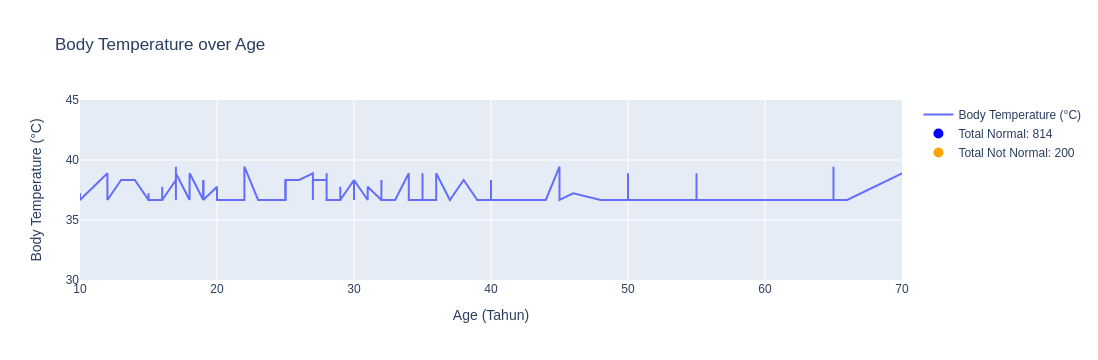

In [3]:
# Mengimpor library yang diperlukan untuk analisis dan pemodelan data
import pandas as pd
import plotly.graph_objs as go
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Membaca data dari file Excel dan menyimpannya dalam variabel 'data'
data = pd.read_excel('data/data_kesehatan.xlsx')
# Mengurutkan data berdasarkan kolom 'Age'
data = data.sort_values(by='Age')

# Mendefinisikan rentang suhu tubuh normal (misalnya, 36.5 hingga 37.5 derajat Celsius)
normal_temp_range = (36.5, 37.5)

# Menentukan apakah suhu tubuh dalam rentang normal atau tidak, dan membuat kolom baru untuk itu
data['TempStatus'] = data['body Temp (celcius)'].apply(lambda x: 'normal' if normal_temp_range[0] <= x <= normal_temp_range[1] else 'not normal')

# Mengelompokkan berdasarkan 'TempStatus' dan menghitung jumlah kemunculannya
temp_status_counts = data['TempStatus'].value_counts()

# Menggunakan LabelEncoder untuk mengubah label teks menjadi angka
label_encoder = LabelEncoder()
data['TempStatus'] = label_encoder.fit_transform(data['TempStatus'])

# Membagi data menjadi fitur (X) dan label (y)
features = data[['Age', 'body Temp (celcius)']]
labels = data['TempStatus']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Membangun model Jaringan Saraf Tiruan (Artificial Neural Network - ANN)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),  # Lapisan input
    layers.Dense(32, activation='relu'),  # Lapisan tersembunyi
    layers.Dense(1, activation='sigmoid')  # Lapisan output
])

# Mengompilasi model dengan optimizer, fungsi loss, dan metrik
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model dengan data pelatihan
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluasi model dengan data pengujian
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi pada data pengujian: {accuracy * 100:.2f}%")

# Mengambil kolom 'Age' dan 'body Temp (celcius)' dari DataFrame untuk visualisasi
x = data['Age']
y = data['body Temp (celcius)']

# Membuat objek Figure dari Plotly untuk visualisasi data
fig = go.Figure()

# Menambahkan grafik suhu tubuh
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Body Temperature (°C)'))

# Menambahkan jejak dummy untuk legenda, dengan mode='none' agar tidak muncul di grafik
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name=f'Total Normal: {temp_status_counts["normal"]}'
))

fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='orange'),
    name=f'Total Not Normal: {temp_status_counts["not normal"]}'
))

# Mengatur layout grafik, termasuk judul, label sumbu x dan y, dan dimensi grafik
fig.update_layout(
    title='Body Temperature over Age',
    xaxis_title='Age (Tahun)',
    yaxis_title='Body Temperature (°C)',
    autosize=True,
    height=600
)

# Mengatur rentang sumbu y grafik
fig.update_yaxes(
    range=[30, 45]
)

# Menampilkan grafik yang telah dibuat
fig.show()


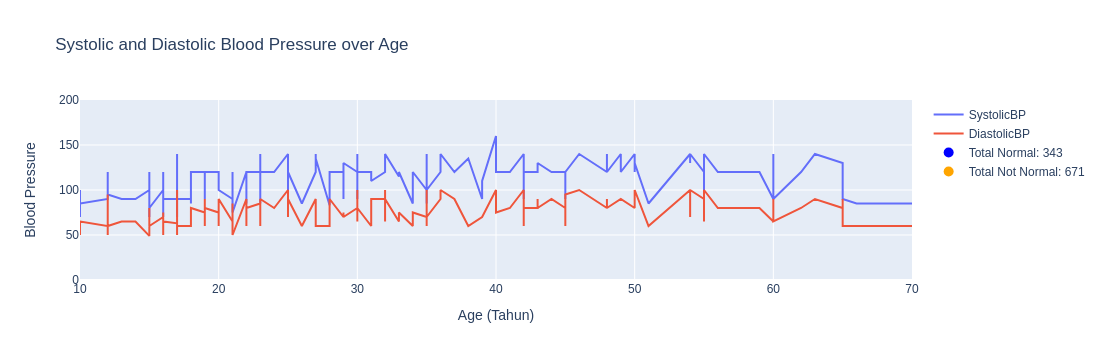

In [4]:
# Mengimpor pustaka Pandas dan memberi alias pd untuk kemudahan dalam penggunaan
import pandas as pd

# Mengimpor pustaka Plotly's graph_objs dan memberi alias go untuk membuat visualisasi data
import plotly.graph_objs as go

# Membaca data dari file Excel 'data_kesehatan.xlsx' dan menyimpannya dalam objek DataFrame yang disebut 'data'
data = pd.read_excel('data/data_kesehatan.xlsx')

# Mengurutkan DataFrame 'data' berdasarkan kolom 'Age' (umur) untuk analisis yang lebih terstruktur
data = data.sort_values(by='Age')

# Fungsi untuk menentukan apakah tekanan darah berada dalam kisaran normal atau tidak
def is_bp_normal(systolic, diastolic):
    return 'normal' if systolic < 120 and diastolic < 80 else 'not normal'

# Menambahkan kolom baru 'BPStatus' ke DataFrame untuk mencatat status tekanan darah
data['BPStatus'] = data.apply(lambda row: is_bp_normal(row['SystolicBP'], row['DiastolicBP']), axis=1)

# Menghitung jumlah kejadian tekanan darah normal dan tidak normal
bp_status_counts = data['BPStatus'].value_counts()

# Mengambil kolom 'Age' dari DataFrame untuk digunakan sebagai sumbu X dalam grafik
x = data['Age']

# Mengambil kolom 'SystolicBP' dari DataFrame untuk digunakan sebagai salah satu sumbu Y dalam grafik
systolic_bp = data['SystolicBP']

# Mengambil kolom 'DiastolicBP' dari DataFrame untuk digunakan sebagai sumbu Y lainnya dalam grafik
diastolic_bp = data['DiastolicBP']

# Membuat objek grafik kosong menggunakan Plotly's Figure
fig = go.Figure()

# Menambahkan garis untuk 'SystolicBP' pada grafik dengan data 'x' dan 'systolic_bp'
fig.add_trace(go.Scatter(x=x, y=systolic_bp, mode='lines', name='SystolicBP'))

# Menambahkan garis untuk 'DiastolicBP' pada grafik dengan gaya garis yang berbeda
fig.add_trace(go.Scatter(x=x, y=diastolic_bp, mode='lines', name='DiastolicBP'))

# Menambahkan jejak dummy untuk legenda dengan total tekanan darah normal dan tidak normal
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name=f'Total Normal: {bp_status_counts.get("normal", 0)}'
))

fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='orange'),
    name=f'Total Not Normal: {bp_status_counts.get("not normal", 0)}'
))

# Mengatur layout grafik, termasuk judul, label sumbu X dan Y, dan dimensi grafik
fig.update_layout(
    title='Systolic and Diastolic Blood Pressure over Age',
    xaxis_title='Age (Tahun)',
    yaxis_title='Blood Pressure',
    autosize=True,
    height=600
)

# Mengatur rentang sumbu Y untuk mengakomodasi nilai tekanan darah
fig.update_yaxes(
    range=[0, 200]
)

# Menampilkan grafik yang telah dibuat ke layar
fig.show()


Epoch 1/10
26/26 [==============================] - 1s 2ms/step - loss: 0.6510 - accuracy: 0.6276
Epoch 2/10
26/26 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.6621
Epoch 3/10
26/26 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.6683
Epoch 4/10
26/26 [==============================] - 0s 3ms/step - loss: 0.5938 - accuracy: 0.6646
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.6695
Epoch 6/10
26/26 [==============================] - 0s 5ms/step - loss: 0.5519 - accuracy: 0.6745
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.6720
Epoch 8/10
26/26 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.6745
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.6782
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5126 - accuracy: 0.7143
Akurasi pada data pen

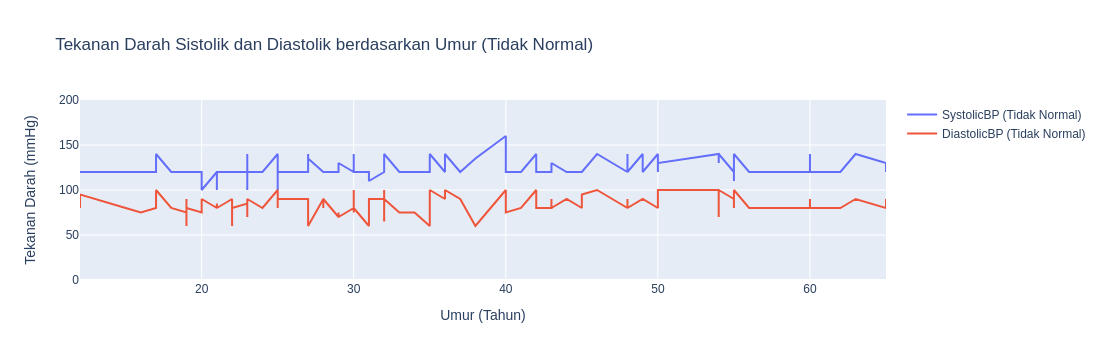

In [5]:
# Mengimpor pustaka yang diperlukan untuk pemrosesan data, pembelajaran mesin, dan visualisasi
import pandas as pd
import plotly.graph_objs as go
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Membaca data dari file Excel dan mengurutkannya berdasarkan umur
data = pd.read_excel('data/data_kesehatan.xlsx')
data = data.sort_values(by='Age')

# Fungsi untuk menentukan apakah tekanan darah dalam batas normal atau tidak
def is_bp_normal(systolic, diastolic):
    return 'normal' if systolic < 120 and diastolic < 80 else 'not normal'

# Menambahkan kolom baru 'BPStatus' ke DataFrame untuk mencatat status tekanan darah
data['BPStatus'] = data.apply(lambda row: is_bp_normal(row['SystolicBP'], row['DiastolicBP']), axis=1)

# Mengubah status tekanan darah dari teks ke nilai biner
label_encoder = LabelEncoder()
data['BPStatus'] = label_encoder.fit_transform(data['BPStatus'])

# Membagi data menjadi fitur (usia, tekanan darah sistolik, dan diastolik) dan label (status tekanan darah)
features = data[['Age', 'SystolicBP', 'DiastolicBP']]
labels = data['BPStatus']

# Memisahkan data menjadi set pelatihan dan pengujian dengan proporsi 80% pelatihan dan 20% pengujian
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Membangun model Jaringan Saraf Tiruan (ANN) dengan tiga lapisan
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)), # Lapisan pertama dengan 64 neuron
    layers.Dense(32, activation='relu'), # Lapisan kedua dengan 32 neuron
    layers.Dense(1, activation='sigmoid') # Lapisan keluaran dengan 1 neuron
])

# Mengompilasi model dengan optimizer 'adam' dan menggunakan 'binary_crossentropy' sebagai fungsi loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model dengan set pelatihan
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Mengevaluasi model dengan set pengujian dan mencetak akurasi
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi pada data pengujian: {accuracy * 100:.2f}%")

# Memfilter data untuk tekanan darah yang tidak normal
data_not_normal = data[data['BPStatus'] == 1] # Anggap '1' berarti 'tidak normal'

# Menyiapkan data untuk plotting
x = data_not_normal['Age']
systolic_bp = data_not_normal['SystolicBP']
diastolic_bp = data_not_normal['DiastolicBP']

# Membuat grafik Plotly untuk tekanan darah yang tidak normal
fig = go.Figure()

# Menambahkan garis untuk SystolicBP dan DiastolicBP pada data yang tidak normal
fig.add_trace(go.Scatter(x=x, y=systolic_bp, mode='lines', name='SystolicBP (Tidak Normal)'))
fig.add_trace(go.Scatter(x=x, y=diastolic_bp, mode='lines', name='DiastolicBP (Tidak Normal)'))

# Mengatur layout grafik
fig.update_layout(
    title='Tekanan Darah Sistolik dan Diastolik berdasarkan Umur (Tidak Normal)',
    xaxis_title='Umur (Tahun)',
    yaxis_title='Tekanan Darah (mmHg)',
    height=600
)

# Mengatur rentang sumbu y
fig.update_yaxes(
    range=[0, 200]
)

# Menampilkan grafik
fig.show()


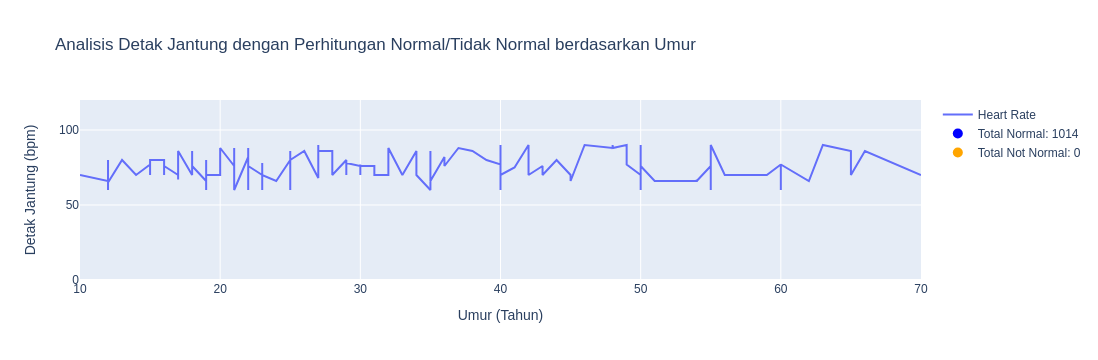

In [6]:
# Mengimpor pustaka Pandas dan memberi alias pd untuk kemudahan dalam penggunaan
import pandas as pd

# Mengimpor pustaka Plotly's graph_objs dan memberi alias go untuk pembuatan grafik interaktif
import plotly.graph_objs as go

# Membaca data dari file Excel 'data_kesehatan.xlsx' dan menyimpannya dalam objek DataFrame bernama 'data'
data = pd.read_excel('data/data_kesehatan.xlsx')

# Mengurutkan DataFrame 'data' berdasarkan kolom 'Age' (umur) untuk analisis data berdasarkan umur
data = data.sort_values(by='Age')

# Mendefinisikan rentang detak jantung normal (misalnya, 60 hingga 100 denyut per menit)
normal_hr_range = (60, 100)

# Menentukan apakah setiap detak jantung normal atau tidak dan membuat kolom baru untuk itu
data['HRStatus'] = data['HeartRate'].apply(lambda x: 'normal' if normal_hr_range[0] <= x <= normal_hr_range[1] else 'not normal')

# Mengelompokkan data berdasarkan 'HRStatus' dan menghitung jumlah kemunculannya
hr_status_counts = data['HRStatus'].value_counts()

# Mengambil kolom 'Age' dari DataFrame dan menyimpannya dalam variabel 'x' untuk sumbu X pada grafik
x = data['Age']

# Mengambil kolom 'HeartRate' dari DataFrame dan menyimpannya dalam variabel 'y' untuk sumbu Y pada grafik
y = data['HeartRate']

# Membuat objek grafik kosong menggunakan Plotly's Figure untuk visualisasi data
fig = go.Figure()

# Menambahkan garis untuk 'HeartRate' pada grafik dengan data 'x' (umur) dan 'y' (detak jantung)
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Heart Rate'))

# Menambahkan jejak dummy untuk legenda dan menampilkan total detak jantung normal
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name=f'Total Normal: {hr_status_counts.get("normal", 0)}'  # Menggunakan .get() untuk menghindari KeyError
))

# Menambahkan jejak dummy untuk menampilkan total detak jantung tidak normal
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='orange'),
    name=f'Total Not Normal: {hr_status_counts.get("not normal", 0)}'  # Menggunakan .get() dengan nilai default 0
))

# Mengatur layout grafik, termasuk judul, label sumbu, dan dimensi
fig.update_layout(
    title='Analisis Detak Jantung dengan Perhitungan Normal/Tidak Normal berdasarkan Umur',
    xaxis_title='Umur (Tahun)',
    yaxis_title='Detak Jantung (bpm)',
    yaxis2=dict(
        title='Total Perhitungan',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    autosize=True,
    height=600
)

# Mengatur rentang sumbu Y untuk nilai detak jantung
fig.update_yaxes(
    range=[0, 120]
)

# Menampilkan grafik yang telah dibuat
fig.show()


Epoch 1/10
26/26 [==============================] - 1s 5ms/step - loss: 0.2447 - accuracy: 0.9149
Epoch 2/10
26/26 [==============================] - 0s 3ms/step - loss: 4.3663e-07 - accuracy: 1.0000
Epoch 3/10
26/26 [==============================] - 0s 2ms/step - loss: 2.6971e-07 - accuracy: 1.0000
Epoch 4/10
26/26 [==============================] - 0s 2ms/step - loss: 2.5970e-07 - accuracy: 1.0000
Epoch 5/10
26/26 [==============================] - 0s 2ms/step - loss: 2.5901e-07 - accuracy: 1.0000
Epoch 6/10
26/26 [==============================] - 0s 2ms/step - loss: 2.5894e-07 - accuracy: 1.0000
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 2.5893e-07 - accuracy: 1.0000
Epoch 8/10
26/26 [==============================] - 0s 2ms/step - loss: 2.5892e-07 - accuracy: 1.0000
Epoch 9/10
26/26 [==============================] - 0s 2ms/step - loss: 2.5890e-07 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 2.4010e-07 - ac

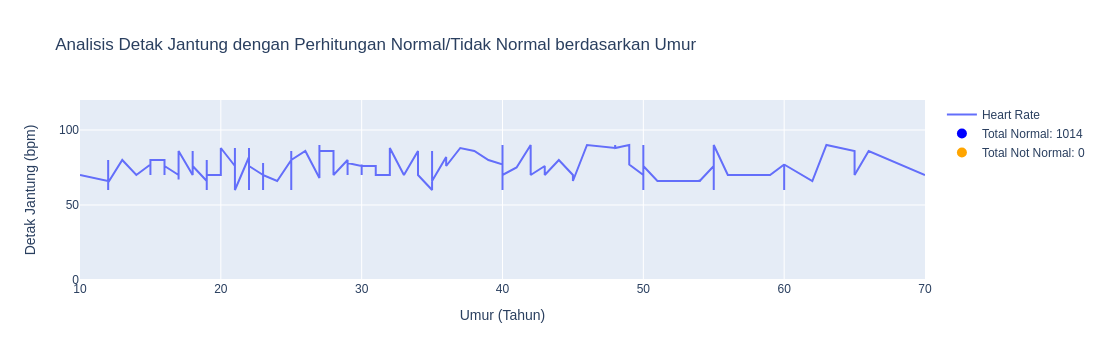

In [7]:
# Mengimpor pustaka Pandas dan memberi alias pd untuk kemudahan dalam penggunaan
import pandas as pd

# Mengimpor pustaka Plotly's graph_objs dan memberi alias go untuk pembuatan grafik interaktif
import plotly.graph_objs as go

# Mengimpor pustaka TensorFlow dan Keras untuk pembuatan dan pelatihan model jaringan saraf
from tensorflow import keras
from tensorflow.keras import layers

# Mengimpor pustaka sklearn untuk pemisahan data dan pengkodean label
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Membaca data dari file Excel 'data_kesehatan.xlsx' dan menyimpannya dalam objek DataFrame bernama 'data'
data = pd.read_excel('data/data_kesehatan.xlsx')

# Mengurutkan DataFrame 'data' berdasarkan kolom 'Age' (umur) untuk analisis data berdasarkan umur
data = data.sort_values(by='Age')

# Mendefinisikan rentang detak jantung normal (misalnya, 60 hingga 100 denyut per menit)
normal_hr_range = (60, 100)

# Menentukan apakah setiap detak jantung normal atau tidak dan membuat kolom baru 'HRStatus' untuk itu
data['HRStatus'] = data['HeartRate'].apply(lambda x: 'normal' if normal_hr_range[0] <= x <= normal_hr_range[1] else 'not normal')

# Mengelompokkan data berdasarkan 'HRStatus' dan menghitung jumlah kemunculannya
hr_status_counts = data['HRStatus'].value_counts()

# Menggunakan LabelEncoder untuk mengonversi status detak jantung menjadi nilai biner
label_encoder = LabelEncoder()
data['HRStatus'] = label_encoder.fit_transform(data['HRStatus'])

# Memilih fitur (Age dan HeartRate) dan label (HRStatus) dari data
features = data[['Age', 'HeartRate']]
labels = data['HRStatus']

# Membagi data menjadi set pelatihan dan pengujian dengan rasio 80-20
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Membangun model jaringan saraf tiruan (ANN) dengan lapisan-lapisan Dense
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),  # Lapisan input dengan 2 fitur
    layers.Dense(32, activation='relu'),  # Lapisan tersembunyi dengan aktivasi ReLU
    layers.Dense(1, activation='sigmoid')  # Lapisan output dengan aktivasi sigmoid (binary classification)
])

# Mengompilasi model dengan optimizer 'adam' dan loss function 'binary_crossentropy'
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model dengan data pelatihan selama 10 epoch dengan ukuran batch 32
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluasi model pada data pengujian
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi pada data pengujian: {accuracy * 100:.2f}%")

# Mengambil kolom 'Age' (umur) dari DataFrame dan menyimpannya dalam variabel 'x'
x = data['Age']

# Mengambil kolom 'HeartRate' (detak jantung) dari DataFrame dan menyimpannya dalam variabel 'y'
y = data['HeartRate']

# Membuat objek grafik kosong menggunakan Plotly's Figure untuk visualisasi data
fig = go.Figure()

# Menambahkan trace berupa garis pada grafik untuk 'HeartRate' dengan data 'x' (umur) dan 'y' sebagai sumbu Y
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Heart Rate'))

# Menambahkan jejak dummy untuk legenda dengan memeriksa keberadaan kunci data
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name=f'Total Normal: {hr_status_counts.get("normal", 0)}'  # Menggunakan .get() untuk menghindari KeyError
))

# Menambahkan jejak dummy untuk menampilkan total detak jantung tidak normal, bahkan jika jumlahnya 0
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='orange'),
    name=f'Total Not Normal: {hr_status_counts.get("not normal", 0)}'  # Menggunakan .get() dengan nilai default 0
))

# Mengatur layout grafik, termasuk judul, label sumbu, dan dimensi
fig.update_layout(
    title='Analisis Detak Jantung dengan Perhitungan Normal/Tidak Normal berdasarkan Umur',
    xaxis_title='Umur (Tahun)',
    yaxis_title='Detak Jantung (bpm)',
    yaxis2=dict(
        title='Total Perhitungan',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    autosize=True,
    height=600
)

# Mengatur rentang sumbu Y untuk nilai detak jantung
fig.update_yaxes(
    range=[0, 120]
)

# Menampilkan grafik yang telah dibuat
fig.show()


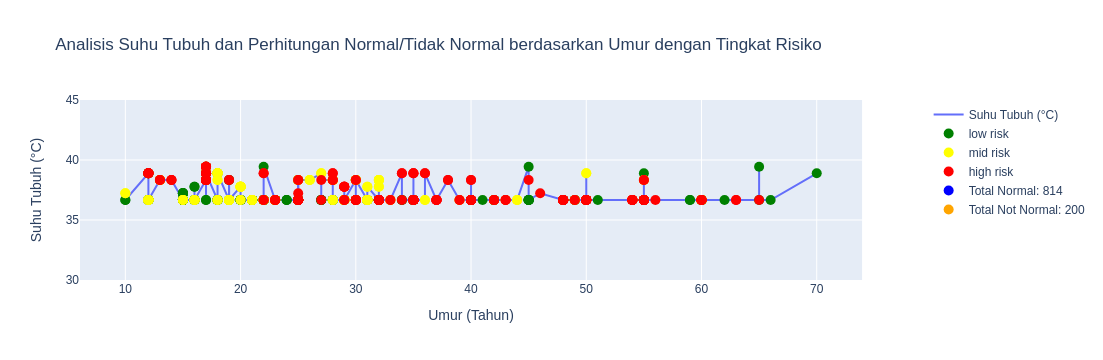

In [8]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Membaca data dari file Excel dan menyimpannya dalam DataFrame 'data'
data = pd.read_excel('data/data_kesehatan.xlsx')

# Mengurutkan DataFrame 'data' berdasarkan kolom 'Age' (umur)
data = data.sort_values(by='Age')

# Mendefinisikan rentang suhu 'normal' (misalnya, 36.5 hingga 37.5 derajat Celsius)
normal_temp_range = (36.5, 37.5)

# Menentukan apakah setiap suhu normal atau tidak dan membuat kolom baru untuk itu
data['TempStatus'] = data['body Temp (celcius)'].apply(lambda x: 'normal' if normal_temp_range[0] <= x <= normal_temp_range[1] else 'not normal')

# Mengelompokkan data berdasarkan 'TempStatus' dan menghitung jumlah kemunculannya
temp_status_counts = data['TempStatus'].value_counts()

# Mengambil 'Age', 'body Temp (celcius)', dan 'RiskLevel' dari data
x = data['Age']
y = data['body Temp (celcius)']
risk_levels = data['RiskLevel']

# Mendefinisikan pemetaan warna untuk tingkat risiko
color_mapping = {'low risk': 'green', 'mid risk': 'yellow', 'high risk': 'red'}

# Membuat subplot dengan sumbu y sekunder
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Menambahkan jejak garis untuk suhu tubuh
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Suhu Tubuh (°C)'), secondary_y=False)

# Menambahkan jejak terpisah untuk setiap tingkat risiko
for risk_level, color in color_mapping.items():
    x_risk = [x[i] for i in range(len(x)) if risk_levels[i] == risk_level]
    y_risk = [y[i] for i in range(len(x)) if risk_levels[i] == risk_level]
    hover_text = [f"Umur: {x[i]}, Suhu: {y[i]}°C, Tingkat Risiko: {risk_levels[i]}" for i in range(len(x)) if risk_levels[i] == risk_level]
    
    fig.add_trace(go.Scatter(
        x=x_risk,
        y=y_risk,
        mode='markers',
        marker=dict(color=color, size=10),
        name=risk_level,
        hovertext=hover_text
    ), secondary_y=False)

# Menambahkan jejak dummy untuk legenda, dengan mode='none' agar tidak ditampilkan di grafik
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name=f'Total Normal: {temp_status_counts["normal"]}'
))

fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='orange'),
    name=f'Total Not Normal: {temp_status_counts["not normal"]}'
))

# Memperbarui layout untuk mencakup sumbu y sekunder dan membuat garis-garis sumbu y sekunder tidak terlihat
fig.update_layout(
    title='Analisis Suhu Tubuh dan Perhitungan Normal/Tidak Normal berdasarkan Umur dengan Tingkat Risiko',
    xaxis_title='Umur (Tahun)',
    yaxis_title='Suhu Tubuh (°C)',
    yaxis2=dict(
        title='Total Perhitungan',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    autosize=True,
    height=600,
)

# Memperbarui konfigurasi sumbu y untuk mencakup nilai dan teks label baru serta rentang baru
fig.update_yaxes(
    range=[30, 45]
)

# Menampilkan grafik
fig.show()


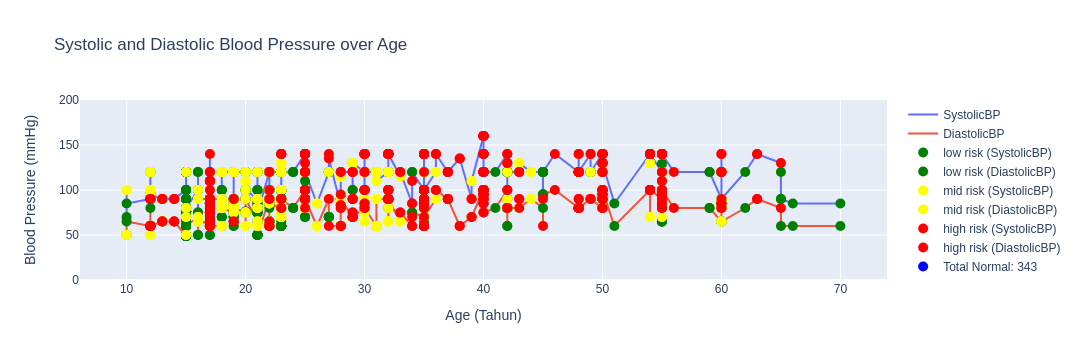

In [9]:
import pandas as pd
import plotly.graph_objs as go

# Membaca data dari file Excel
data = pd.read_excel('data/data_kesehatan.xlsx')
data = data.sort_values(by='Age')

# Fungsi untuk menentukan apakah tekanan darah normal atau tidak
def is_bp_normal(systolic, diastolic):
    return 'normal' if systolic < 120 and diastolic < 80 else 'not normal'

# Menambahkan kolom baru 'BPStatus' ke dalam DataFrame
data['BPStatus'] = data.apply(lambda row: is_bp_normal(row['SystolicBP'], row['DiastolicBP']), axis=1)

# Menghitung jumlah kemunculan tekanan darah normal dan tidak normal
bp_status_counts = data['BPStatus'].value_counts()

# Mengekstrak kolom-kolom yang akan digunakan dalam plot
x = data['Age']
systolic_bp = data['SystolicBP']
diastolic_bp = data['DiastolicBP']

# Mendefinisikan pemetaan warna untuk tingkat risiko
color_mapping = {'low risk': 'green', 'mid risk': 'yellow', 'high risk': 'red'}

# Membuat objek Plotly
fig = go.Figure()

# Menambahkan trace (jejak) untuk tekanan darah sistolik dan diastolik
fig.add_trace(go.Scatter(x=x, y=systolic_bp, mode='lines', name='SystolicBP'))
fig.add_trace(go.Scatter(x=x, y=diastolic_bp, mode='lines', name='DiastolicBP'))

# Memisahkan data berdasarkan tingkat risiko dan menambahkan trace untuk setiap tingkat risiko
for risk_level, color in color_mapping.items():
    risk_data = data[data['RiskLevel'] == risk_level]
    x_risk = risk_data['Age']
    systolic_risk = risk_data['SystolicBP']
    diastolic_risk = risk_data['DiastolicBP']
    
    # Membuat teks hover
    hover_text = [f"Age: {age}, SystolicBP: {systolic}, DiastolicBP: {diastolic}, Risk Level: {risk_level}"
                  for age, systolic, diastolic in zip(x_risk, systolic_risk, diastolic_risk)]

    # Menambahkan scatter plot untuk setiap tingkat risiko, baik untuk SystolicBP maupun DiastolicBP
    fig.add_trace(go.Scatter(
        x=x_risk,
        y=systolic_risk,
        mode='markers',
        marker=dict(color=color, size=10),
        name=f'{risk_level} (SystolicBP)',
        hovertext=hover_text
    ))

    fig.add_trace(go.Scatter(
        x=x_risk,
        y=diastolic_risk,
        mode='markers',
        marker=dict(color=color, size=10),
        name=f'{risk_level} (DiastolicBP)',
        hovertext=hover_text
    ))

# Menambahkan trace palsu (dummy) untuk legenda
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name=f'Total Normal: {bp_status_counts.get("normal", 0)}'  # Mendapatkan jumlah 'normal' atau 0 jika tidak ada
))

fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='orange'),
    name=f'Total Not Normal: {bp_status_counts.get("not normal", 0)}'  # Mendapatkan jumlah 'not normal' atau 0 jika tidak ada
))

# Memperbarui tata letak (layout)
fig.update_layout(
    title='Systolic and Diastolic Blood Pressure over Age',
    xaxis_title='Age (Tahun)',
    yaxis_title='Blood Pressure (mmHg)',
    height=600
)

fig.update_yaxes(
    range=[0, 200]
)

# Menampilkan plot
fig.show()


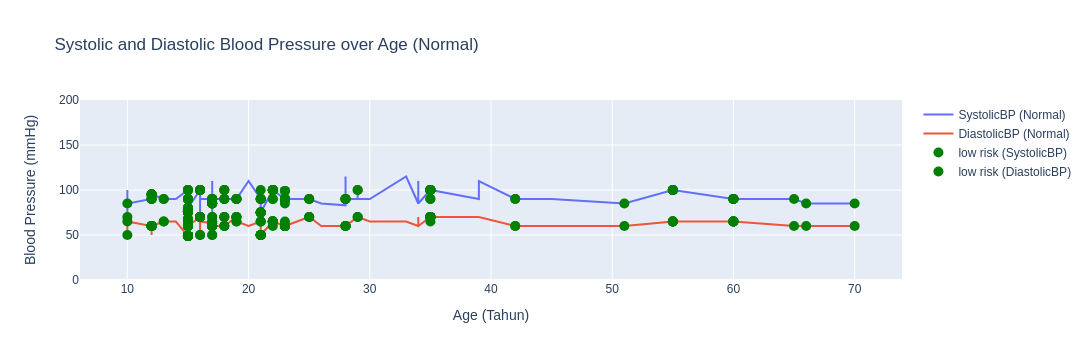

In [11]:
import pandas as pd
import plotly.graph_objs as go

# Membaca data dari file Excel
data = pd.read_excel('data/data_kesehatan.xlsx')
data = data.sort_values(by='Age')

# Fungsi untuk menentukan apakah tekanan darah normal atau tidak
def is_bp_normal(systolic, diastolic):
    return 'normal' if systolic < 120 and diastolic < 80 else 'not normal'

# Menambahkan kolom baru 'BPStatus' ke dalam DataFrame
data['BPStatus'] = data.apply(lambda row: is_bp_normal(row['SystolicBP'], row['DiastolicBP']), axis=1)

# Memfilter data hanya untuk tekanan darah yang normal
data_normal = data[data['BPStatus'] == 'normal']

# Mengekstrak kolom-kolom yang akan digunakan dalam plot
x = data_normal['Age']
systolic_bp = data_normal['SystolicBP']
diastolic_bp = data_normal['DiastolicBP']

# Mendefinisikan pemetaan warna untuk tingkat risiko
color_mapping = {'low risk': 'green'}

# Membuat objek Plotly untuk tekanan darah yang normal
fig = go.Figure()

# Menambahkan trace (jejak) untuk tekanan darah sistolik dan diastolik untuk data normal
fig.add_trace(go.Scatter(x=x, y=systolic_bp, mode='lines', name='SystolicBP (Normal)'))
fig.add_trace(go.Scatter(x=x, y=diastolic_bp, mode='lines', name='DiastolicBP (Normal)'))

# Menambahkan data terpisah untuk setiap tingkat risiko
for risk_level, color in color_mapping.items():
    risk_data = data_normal[data_normal['RiskLevel'] == risk_level]
    x_risk = risk_data['Age']
    systolic_risk = risk_data['SystolicBP']
    diastolic_risk = risk_data['DiastolicBP']

    # Membuat teks hover
    hover_text = [f"Age: {age}, SystolicBP: {systolic}, DiastolicBP: {diastolic}, Risk Level: {risk_level}"
                  for age, systolic, diastolic in zip(x_risk, systolic_risk, diastolic_risk)]

    # Menambahkan scatter plot untuk setiap tingkat risiko, baik untuk SystolicBP maupun DiastolicBP
    fig.add_trace(go.Scatter(
        x=x_risk,
        y=systolic_risk,
        mode='markers',
        marker=dict(color=color, size=10),
        name=f'{risk_level} (SystolicBP)',
        hovertext=hover_text
    ))

    fig.add_trace(go.Scatter(
        x=x_risk,
        y=diastolic_risk,
        mode='markers',
        marker=dict(color=color, size=10),
        name=f'{risk_level} (DiastolicBP)',
        hovertext=hover_text
    ))

# Memperbarui tata letak (layout)
fig.update_layout(
    title='Systolic and Diastolic Blood Pressure over Age (Normal)',
    xaxis_title='Age (Tahun)',
    yaxis_title='Blood Pressure (mmHg)',
    height=600
)

fig.update_yaxes(
    range=[0, 200]
)

# Menampilkan plot untuk tekanan darah yang normal
fig.show()


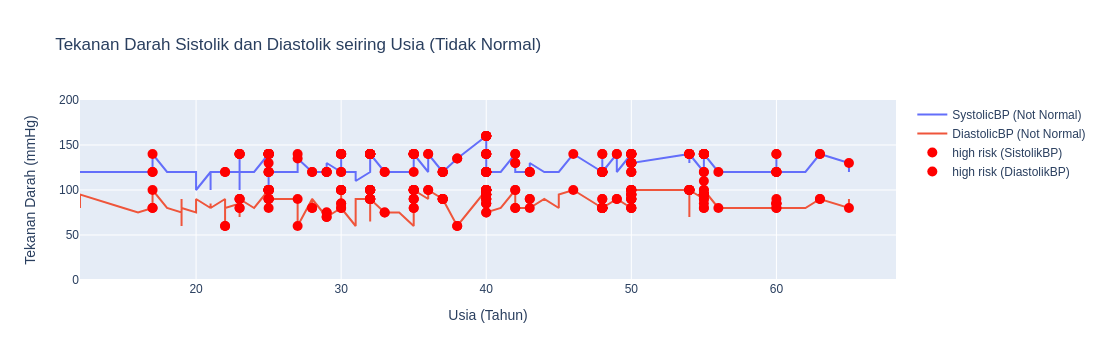

In [12]:
import pandas as pd
import plotly.graph_objs as go

# Membaca data dari file Excel
data = pd.read_excel('data/data_kesehatan.xlsx')

# Mengurutkan data berdasarkan kolom 'Age' (Usia)
data = data.sort_values(by='Age')

# Fungsi untuk menentukan apakah tekanan darah normal atau tidak
def is_bp_normal(systolic, diastolic):
    return 'normal' if systolic < 120 and diastolic < 80 else 'not normal'

# Menambahkan kolom baru 'BPStatus' ke dalam DataFrame
data['BPStatus'] = data.apply(lambda row: is_bp_normal(row['SystolicBP'], row['DiastolicBP']), axis=1)

# Memfilter data hanya untuk tekanan darah yang tidak normal
data_not_normal = data[data['BPStatus'] == 'not normal']

# Mengekstrak kolom-kolom yang akan digunakan dalam plot
x = data_not_normal['Age']
systolic_bp = data_not_normal['SystolicBP']
diastolic_bp = data_not_normal['DiastolicBP']

# Mendefinisikan pemetaan warna untuk tingkat risiko (hanya 'high risk' dalam hal ini)
color_mapping = {'high risk': 'red'}

# Membuat objek Plotly untuk tekanan darah yang tidak normal
fig = go.Figure()

# Menambahkan jejak (trace) untuk tekanan darah sistolik dan diastolik untuk data yang tidak normal
fig.add_trace(go.Scatter(x=x, y=systolic_bp, mode='lines', name='SystolicBP (Not Normal)'))
fig.add_trace(go.Scatter(x=x, y=diastolic_bp, mode='lines', name='DiastolicBP (Not Normal)'))

# Menambahkan data terpisah untuk setiap tingkat risiko
for risk_level, color in color_mapping.items():
    risk_data = data_not_normal[data_not_normal['RiskLevel'] == risk_level]
    x_risk = risk_data['Age']
    systolic_risk = risk_data['SystolicBP']
    diastolic_risk = risk_data['DiastolicBP']

    # Membuat teks hover
    hover_text = [f"Usia: {age}, SistolikBP: {systolic}, DiastolikBP: {diastolic}, Tingkat Risiko: {risk_level}"
                  for age, systolic, diastolic in zip(x_risk, systolic_risk, diastolic_risk)]

    # Menambahkan plot titik (scatter plot) untuk setiap tingkat risiko, baik untuk SistolikBP maupun DiastolikBP
    fig.add_trace(go.Scatter(
        x=x_risk,
        y=systolic_risk,
        mode='markers',
        marker=dict(color=color, size=10),
        name=f'{risk_level} (SistolikBP)',
        hovertext=hover_text
    ))

    fig.add_trace(go.Scatter(
        x=x_risk,
        y=diastolic_risk,
        mode='markers',
        marker=dict(color=color, size=10),
        name=f'{risk_level} (DiastolikBP)',
        hovertext=hover_text
    ))

# Memperbarui tata letak (layout)
fig.update_layout(
    title='Tekanan Darah Sistolik dan Diastolik seiring Usia (Tidak Normal)',
    xaxis_title='Usia (Tahun)',
    yaxis_title='Tekanan Darah (mmHg)',
    height=600
)

# Memperbarui sumbu y (y-axis) untuk menampilkan rentang dari 0 hingga 200
fig.update_yaxes(
    range=[0, 200]
)

# Menampilkan plot untuk tekanan darah yang tidak normal
fig.show()


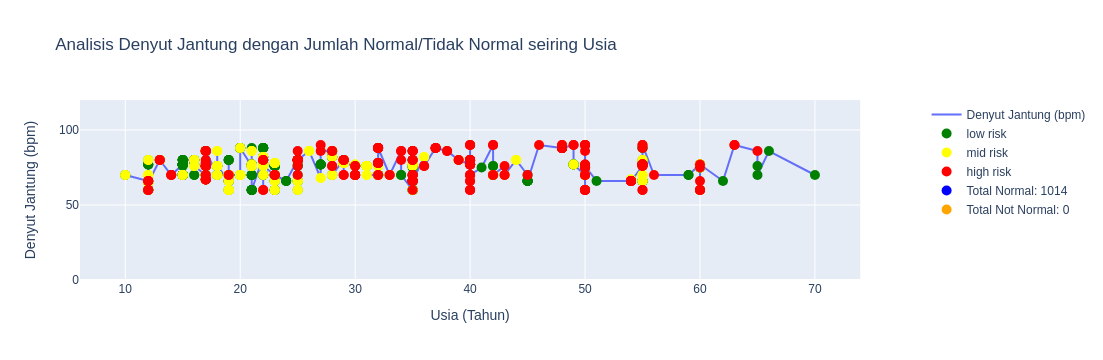

In [13]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Membaca data dari file Excel
data = pd.read_excel('data/data_kesehatan.xlsx')

# Mengurutkan data berdasarkan kolom 'Age' (Usia)
data = data.sort_values(by='Age')

# Mendefinisikan rentang 'normal' denyut jantung
normal_hr_range = (60, 100)

# Menentukan apakah setiap denyut jantung normal atau tidak, dan membuat kolom baru untuk itu
data['HRStatus'] = data['HeartRate'].apply(lambda x: 'normal' if normal_hr_range[0] <= x <= normal_hr_range[1] else 'not normal')

# Mengelompokkan berdasarkan 'HRStatus' dan menghitung jumlah kemunculannya
hr_status_counts = data['HRStatus'].value_counts()

# Mengekstrak 'Age', 'HeartRate', dan 'RiskLevel' dari data
x = data['Age']
y = data['HeartRate']
risk_levels = data['RiskLevel']

# Mendefinisikan pemetaan warna untuk tingkat risiko
color_mapping = {'low risk': 'green', 'mid risk': 'yellow', 'high risk': 'red'}

# Membuat subplot dengan sumbu y sekunder
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Menambahkan jejak garis untuk denyut jantung
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Denyut Jantung (bpm)'), secondary_y=False)

# Menambahkan jejak terpisah untuk setiap tingkat risiko
for risk_level, color in color_mapping.items():
    x_risk = [x[i] for i in range(len(x)) if risk_levels[i] == risk_level]
    y_risk = [y[i] for i in range(len(x)) if risk_levels[i] == risk_level]
    hover_text = [f"Usia: {x[i]}, Denyut Jantung: {y[i]} bpm, Tingkat Risiko: {risk_levels[i]}" for i in range(len(x)) if risk_levels[i] == risk_level]
    
    fig.add_trace(go.Scatter(
        x=x_risk,
        y=y_risk,
        mode='markers',
        marker=dict(color=color, size=10),
        name=risk_level,
        hovertext=hover_text
    ), secondary_y=False)

# Menambahkan jejak palsu (dummy) untuk legenda dengan pengecekan keberadaan kunci
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name=f'Total Normal: {hr_status_counts.get("normal", 0)}'  # Menggunakan .get() untuk menghindari KeyError
))

# Menyesuaikan plot untuk mencakup jumlah 'Not Normal' bahkan jika nilainya 0
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='orange'),
    name=f'Total Not Normal: {hr_status_counts.get("not normal", 0)}'  # Menggunakan .get() dengan nilai default 0
))

# Memperbarui tata letak (layout)
fig.update_layout(
    title='Analisis Denyut Jantung dengan Jumlah Normal/Tidak Normal seiring Usia',
    xaxis_title='Usia (Tahun)',
    yaxis_title='Denyut Jantung (bpm)',
    yaxis2=dict(
        title='Total Jumlah',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    autosize=True,
    height=600
)

# Memperbarui sumbu y (y-axis) untuk menampilkan rentang dari 0 hingga 120
fig.update_yaxes(
    range=[0, 120]
)

# Menampilkan plot
fig.show()


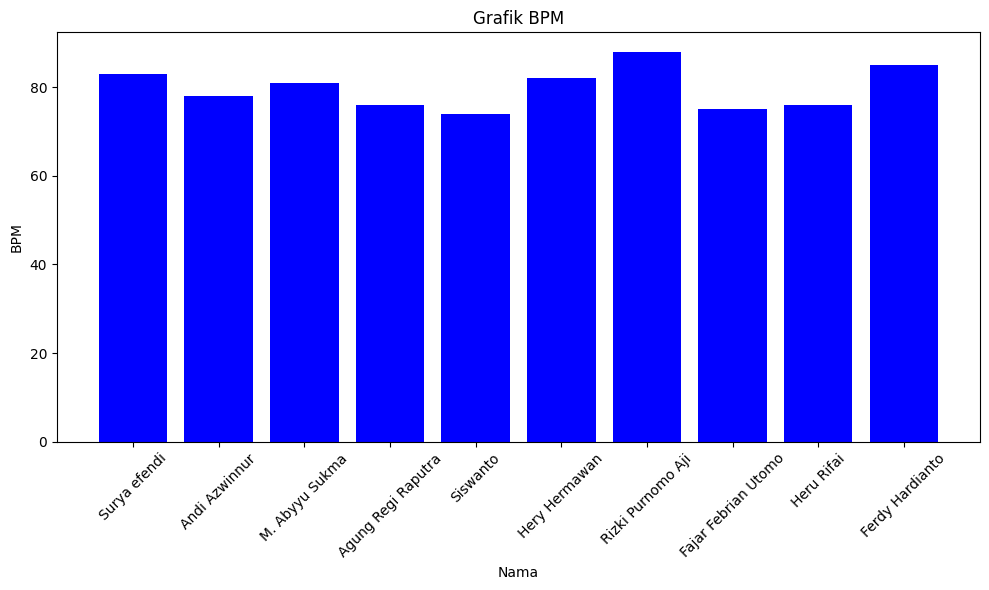

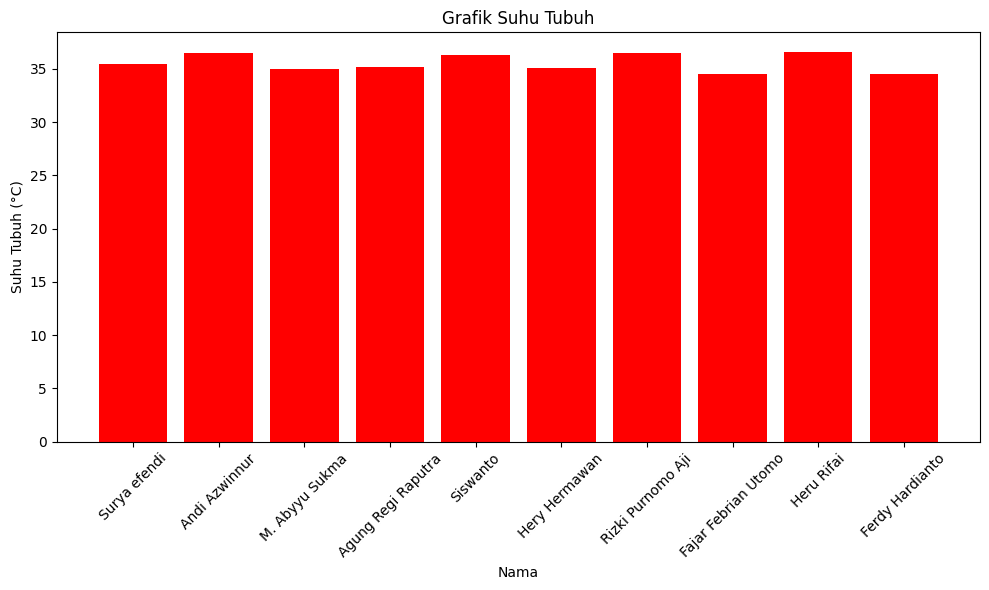

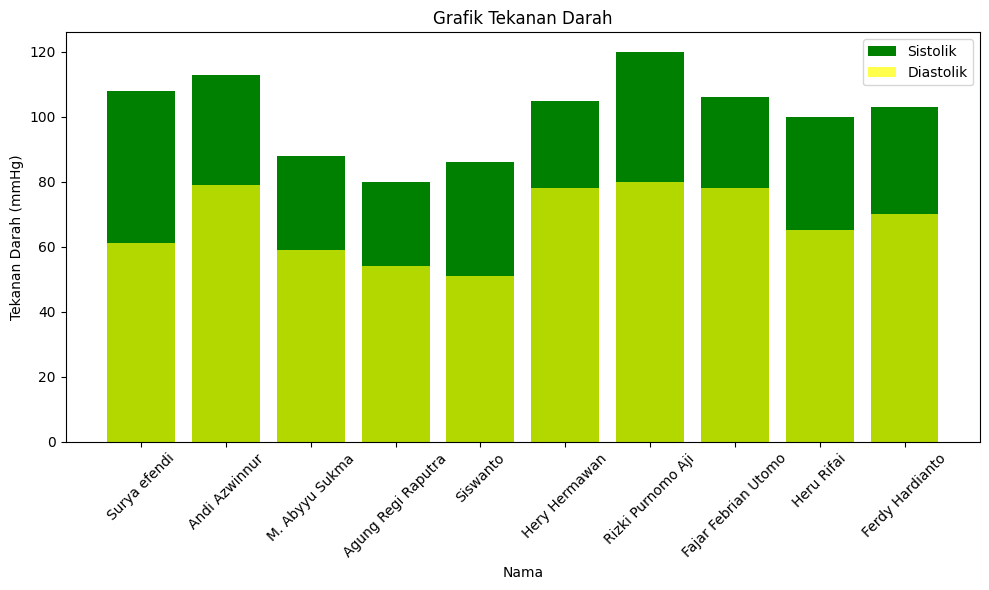

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from docx import Document

# Membuka dokumen
file_path = 'data/data_alat.docx'  # Ganti dengan lokasi file Anda
doc = Document(file_path)

# Mengekstrak data dari tabel
data = [[cell.text for cell in row.cells] for row in doc.tables[0].rows]

# Mengonversi data ke DataFrame
header = data[0]
df = pd.DataFrame(data[1:], columns=header)

# Membersihkan dan mengkonversi data
df['BPM'] = df['BPM'].astype(int)
df['Suhu tubuh'] = df['Suhu tubuh'].str.replace(' °C', '').str.replace(',', '.').astype(float)
df[['Tekanan Darah Sistolik', 'Tekanan Darah Diastolik']] = df['Tekanan Darah'].str.split('/', expand=True)
df['Tekanan Darah Sistolik'] = df['Tekanan Darah Sistolik'].str.strip().astype(int)
df['Tekanan Darah Diastolik'] = df['Tekanan Darah Diastolik'].str.replace('mmHg', '').str.strip().astype(int)

# Membuat grafik BPM
plt.figure(figsize=(10, 6))
plt.bar(df['Nama'], df['BPM'], color='blue')
plt.xlabel('Nama')
plt.ylabel('BPM')
plt.title('Grafik BPM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat grafik Suhu Tubuh
plt.figure(figsize=(10, 6))
plt.bar(df['Nama'], df['Suhu tubuh'], color='red')
plt.xlabel('Nama')
plt.ylabel('Suhu Tubuh (°C)')
plt.title('Grafik Suhu Tubuh')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat grafik Tekanan Darah
plt.figure(figsize=(10, 6))
plt.bar(df['Nama'], df['Tekanan Darah Sistolik'], color='green', label='Sistolik')
plt.bar(df['Nama'], df['Tekanan Darah Diastolik'], color='yellow', label='Diastolik', alpha=0.7)
plt.xlabel('Nama')
plt.ylabel('Tekanan Darah (mmHg)')
plt.title('Grafik Tekanan Darah')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


7/7 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9901
Akurasi Model: 99.01%


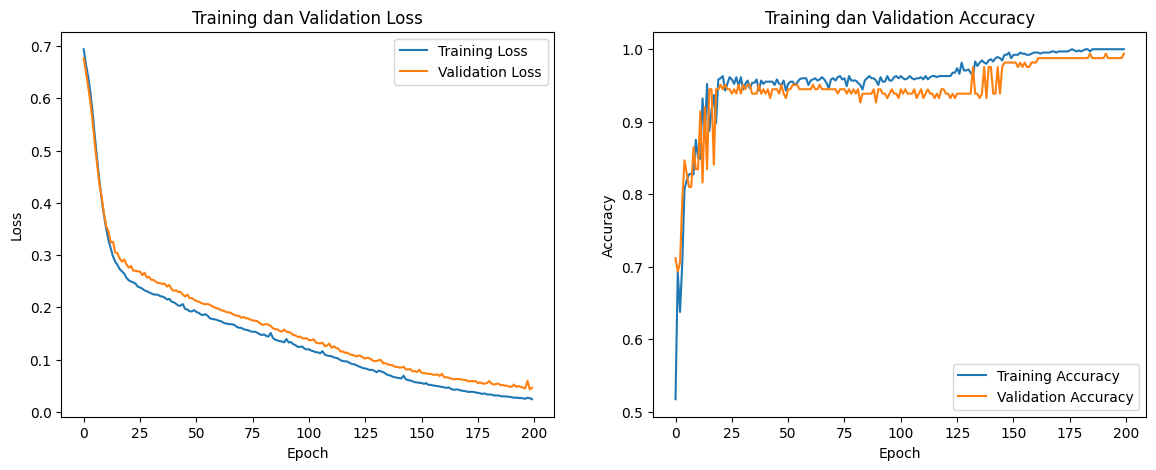

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Path ke file data
file_path = 'data/cleaned_data_kesehatan.xlsx'

# Membaca data dari file Excel
data_kesehatan = pd.read_excel(file_path)

# Mendefinisikan fungsi klasifikasi untuk menentukan status kesehatan
def klasifikasi_normal_tidak_normal(row):
    normal = True
    # Kriteria tekanan darah sistolik dan diastolik
    if row['SystolicBP'] > 120 or row['DiastolicBP'] > 80:
        normal = False
    # Kriteria suhu tubuh
    if not 36.5 <= row['body Temp (celcius)'] <= 37.5:
        normal = False
    # Kriteria denyut jantung
    if not 60 <= row['HeartRate'] <= 100:
        normal = False
    return 'normal' if normal else 'tidak normal'

# Menerapkan fungsi klasifikasi ke DataFrame
data_kesehatan['Status'] = data_kesehatan.apply(klasifikasi_normal_tidak_normal, axis=1)

# Memisahkan fitur dan label
X = data_kesehatan[['Age', 'SystolicBP', 'DiastolicBP', 'body Temp (celcius)', 'HeartRate']]
y = data_kesehatan['Status']

# Encoding label
y_encoded = pd.get_dummies(y, drop_first=True)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membangun model ANN
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Kompilasi model dengan Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Pelatihan model dengan early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Evaluasi model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Akurasi Model: {accuracy*100:.2f}%")

# Plotting loss dan akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training dan Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training dan Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
